In [4]:
import matplotlib.pyplot as plt
import igraph as ig
import networkx as nx
import time
import numpy as np
from collections import defaultdict
from mdst import get_mdst

Посмотрим на среднее время работы для связных графов на 8 вершинах сгруппированное по количеству ребер

In [54]:
graph8c = nx.read_graph6("tests/graph8c.g6")

На время работы алгоритма влияет много обстоятельств. Я прогоню весь сет графов 10 раз, так сожем точнее получить результаты.

In [75]:
e_work_times = defaultdict(list)
cnt_iter = 10
for k in range(cnt_iter):
    for graph in graph8c:
        g = ig.Graph.from_networkx(graph)
        
        elapsed_time =  time.time()
        tree = get_mdst(g)
        elapsed_time = time.time() - elapsed_time
        
        e_work_times[g.ecount()].append(elapsed_time)

for tm in e_work_times:
    e_work_times[tm] = np.array(e_work_times[tm]).mean()

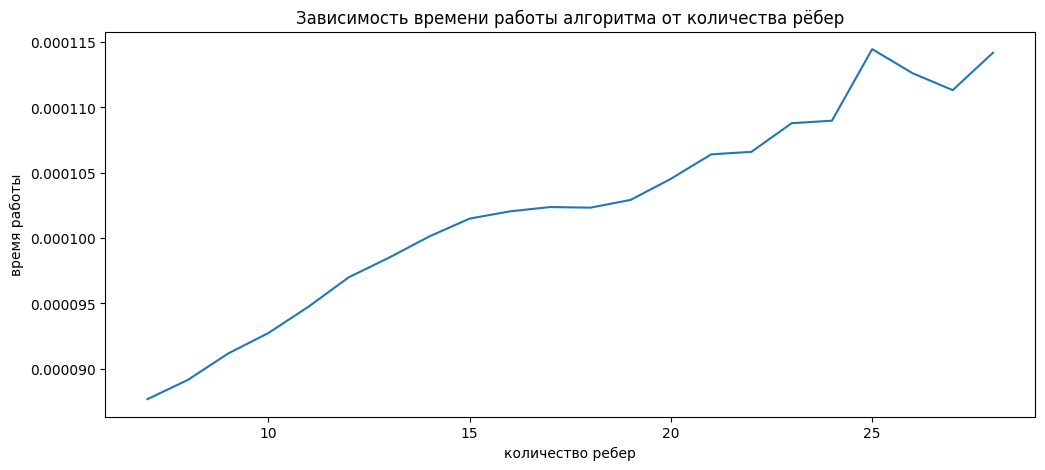

In [76]:
e_lists = sorted(e_work_times.items())
e_x, e_y = zip(*e_lists)
plt.figure(figsize=(12, 5))
plt.plot(e_x, e_y)
plt.title('Зависимость времени работы алгоритма от количества рёбер')
plt.ylabel('время работы')
plt.xlabel('количество ребер')
plt.show()

Наблюдаем линейную зависимость от количества ребёр. Это согласуется с найденной нами асимптотикой.

Ещё можно посмотреть отдельно на время работы для планарных графов на 8 вершинах.

In [77]:
planar8 = nx.read_graph6("tests/planar_conn.8.g6")

In [81]:
p_work_times = defaultdict(list)
cnt_iter = 10
for k in range(cnt_iter):
    for graph in planar8:
        if not nx.is_connected(graph):
            continue
        g = ig.Graph.from_networkx(graph)
        
        elapsed_time =  time.time()
        tree = get_mdst(g)
        elapsed_time = time.time() - elapsed_time
        
        p_work_times[g.ecount()].append(elapsed_time)

for tm in p_work_times:
    p_work_times[tm] = np.array(p_work_times[tm]).mean()

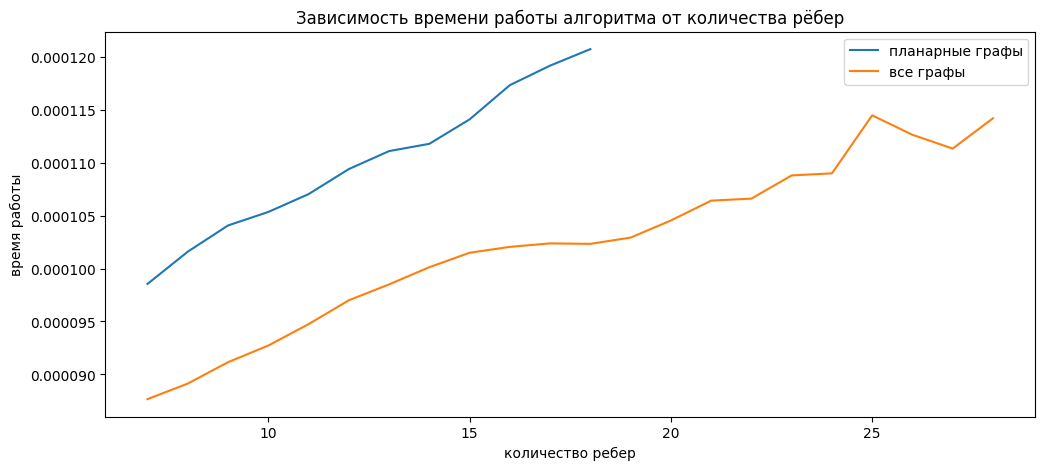

In [79]:
lists = sorted(p_work_times['mean'].items())
p_x, p_y = zip(*lists)
plt.figure(figsize=(12, 5))
plt.plot(p_x, p_y, label='планарные графы')
plt.plot(e_x, e_y, label='все графы')
plt.title('Зависимость времени работы алгоритма от количества рёбер')
plt.ylabel('время работы')
plt.xlabel('количество ребер')
plt.legend()
plt.show()

Видим, что наш алгоритм на планарных графах работает хуже. Непонятно, цыганские фокусы, наверное..

Дальше проанализируем зависимость времени работы алгоритма от количества вершин. Для этого возьмем все связные графы с 12 ребрами.

In [55]:
ge12c = nx.read_graph6("tests/ge12c.g6")

In [69]:
work_times = defaultdict(list)
cnt_iter = 10
for k in range(cnt_iter):
    for graph in ge12c:
        g = ig.Graph.from_networkx(graph)
        
        elapsed_time =  time.time()
        tree = get_mdst(g)
        elapsed_time = time.time() - elapsed_time
        
        work_times[g.vcount()].append(elapsed_time)

for tm in work_times:
    work_times[tm] = np.array(work_times[tm]).mean()

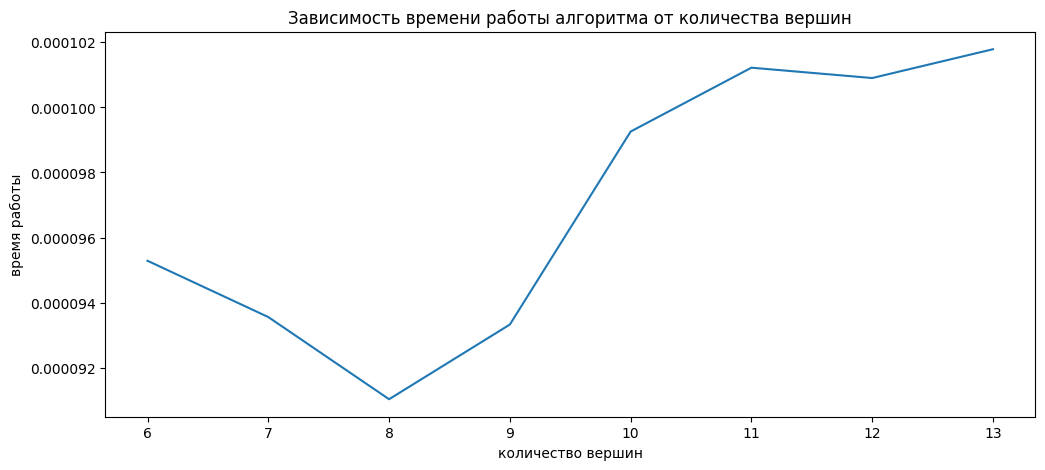

In [70]:
lists = sorted(work_times.items())
x, y = zip(*lists)
plt.figure(figsize=(12, 5))
plt.plot(x, y)
plt.title('Зависимость времени работы алгоритма от количества вершин')
plt.ylabel('время работы')
plt.xlabel('количество вершин')
plt.show()

Наверное, слишком мало вершин, чтобы хоть что-то понять про зависимость от количества вершин.

Дальше будем анализировать случаные графы. Возьмем количества вершин $N = [10, 50, 100, 500, 1000]$. Работаем в модели Ердеша-Реньи. Так как граф должен быть связным, возьмем вероятность ребра равную $\frac{1}{2}$. Асимптотически почти наверное граф будет связным.

In [7]:
N = [10, 50, 100, 500, 1000, 1500, 2000]
p = 1/2
cnt_iter = 10

In [8]:
work_times = {}
for n in N:
    tm = 0
    for k in range(cnt_iter):
        graph = nx.fast_gnp_random_graph(n, p)
        graph = ig.Graph.from_networkx(graph)
        
        elapsed_time =  time.time()
        tree = get_mdst(graph)
        elapsed_time = time.time() - elapsed_time
        
        tm = tm + elapsed_time
    tm = tm / 10
    work_times[n] = tm

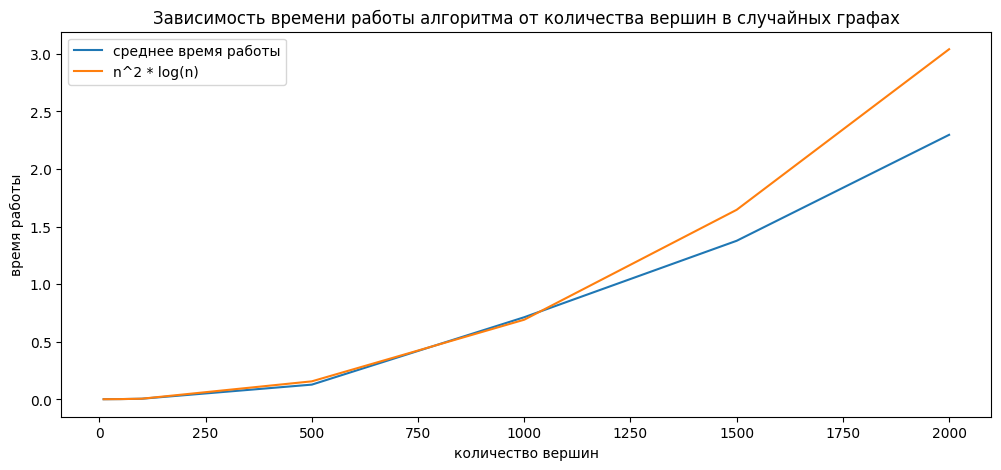

In [17]:
lists = sorted(work_times.items())
x, y = zip(*lists)
x =  np.array(x)
k = 1e-7
plt.figure(figsize=(12, 5))
plt.plot(x, y, label='среднее время работы')
plt.plot(x, x**2 * np.log(x) * k, label=r'n^2 * log(n)')
plt.title('Зависимость времени работы алгоритма от количества вершин в случайных графах')
plt.ylabel('время работы')
plt.xlabel('количество вершин')
plt.legend()
plt.show()

Большее количество вершин потестить не получается, ядро в юпитере крашится.

График даёт нам весьма странный результат. Теоретическая асимптотика получалась куда больше, здесь мы просто выкинули количество количество ребер, хотя это существенный множитель (матож порядка $n^2 / 2$). Можно сделать вывод, что для не очень больших значений $N$ алгоритм на практике работает сильно лучше теоритической асимптотики.